# USA Real Estate Machine Learning Regression Analysis

### This notebook contains:

I. libraries and data imports

II. data wrangling and cleaning

III. data preparation for regression analysis

IV. regression analysis

## I. libraries and data imports

In [2]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
# graphs are called up in notebook
%matplotlib inline

In [6]:
# create path shortcut
path = r'C:\Users\lisag\Desktop\CF Work\Immersion 6 Tasks'

In [8]:
df = pd.read_csv(os.path.join(path, 'USA Real Estate Cleaned No Outliers.csv'))

## II. data wrangling and cleaning

In [11]:
# drop 'Unnamed: 0' column
df = df.drop(columns = ['Unnamed: 0'])

In [13]:
# change 'brokered_by' to object/string data type
df['brokered_by'] = df['brokered_by'].astype('str')

In [15]:
# change 'zip_code' to object/string data type
df['zip_code'] = df['zip_code'].astype('str')

In [17]:
df.dtypes

brokered_by        object
status             object
price             float64
bed               float64
bath              float64
acre_lot          float64
city               object
state              object
zip_code           object
house_size        float64
prev_sold_date     object
dtype: object

In [19]:
df.head()

,brokered_by,status,price,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,1970-01-01
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,1970-01-01
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,1970-01-01
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,1970-01-01
4,103378.0,for_sale,179000.0,4.0,3.0,0.46,San Sebastian,Puerto Rico,612.0,2520.0,1970-01-01


In [21]:
# rename columns
df.rename(columns = {'brokered_by' : 'Broker Number', 'status': 'House Status', 'price': 'House Price', 
                     'bed': 'N. Beds', 'bath': 'N. Baths', 'acre_lot' : 'N. Acres', 'city' : 'City', 'state' : 'State', 'zip_code' : ' Zip Code', 
                     'house_size' : 'House SQFT', 'prev_sold_date' : 'Last Sell Date' }, inplace = True)

In [23]:
df.head()

,Broker Number,House Status,House Price,N. Beds,N. Baths,N. Acres,City,State,Zip Code,House SQFT,Last Sell Date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,1970-01-01
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,1970-01-01
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,1970-01-01
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,1970-01-01
4,103378.0,for_sale,179000.0,4.0,3.0,0.46,San Sebastian,Puerto Rico,612.0,2520.0,1970-01-01


## III. data preparation for regression analysis

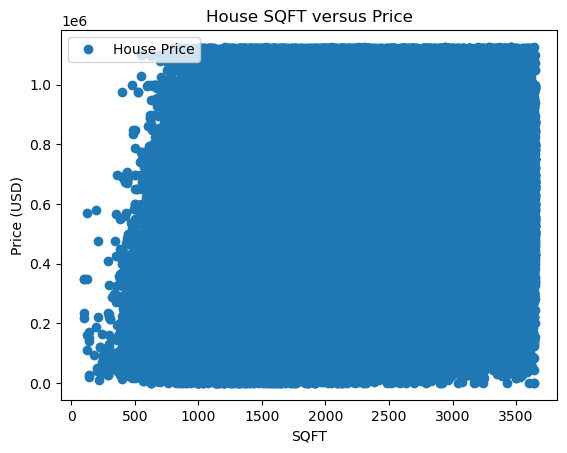

In [26]:
# create a scatterplot using matplotlib for 'House SQFT' and 'House Price'
df.plot(x = 'House SQFT', y='House Price',style='o') # style option creates a scatterplot
plt.title('House SQFT versus Price')  
plt.xlabel('SQFT')  
plt.ylabel('Price (USD)')  
plt.show()

In [28]:
# reshape variables into NumPy arrays and put them into separate objects
X = df['House SQFT'].values.reshape(-1,1)
y = df['House Price'].values.reshape(-1,1)

In [30]:
# split data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## IV. regression analysis 

In [33]:
# create a regression object
regression = LinearRegression()  # the regression object will be fit onto the training set

In [35]:
# fit the regression object onto training set
regression.fit(X_train, y_train)

LinearRegression()

In [37]:
# predict the values of y using X
y_predicted = regression.predict(X_test)

In [47]:
# removing scientific notation from the results
pd.set_option('display.float_format', '{:.2f}'.format)

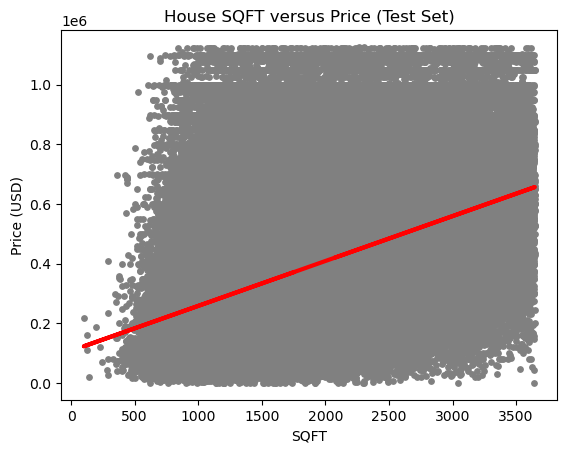

In [49]:
# create a plot that shows the regression line from the model on the test set
plot_test = plt

plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)

plot_test.title('House SQFT versus Price (Test Set)')
plot_test.xlabel('SQFT')
plot_test.ylabel('Price (USD)')

plot_test.show()

C:\Users\lisag\AppData\Local\Temp\ipykernel_5988\3724213608.py:17: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig("house_price_regression.png", dpi=300, bbox_inches='tight')
C:\Users\lisag\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


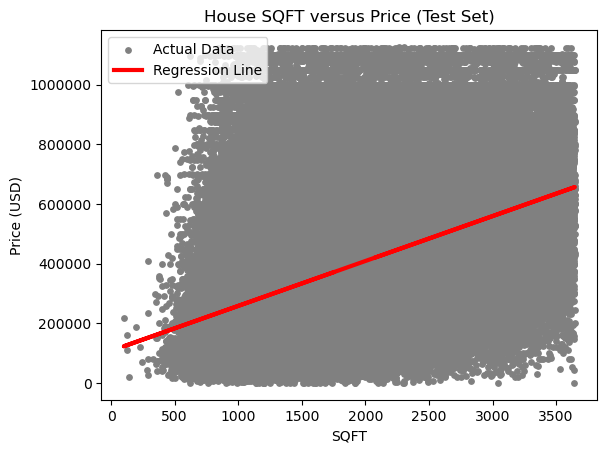

In [51]:
import matplotlib.ticker as mticker
# create the plot
fig, ax = plt.subplots()
# ccatter plot of test data
ax.scatter(X_test, y_test, color='gray', s=15, label="Actual Data")
# regression line
ax.plot(X_test, y_predicted, color='red', linewidth=3, label="Regression Line")
# titles and labels
ax.set_title('House SQFT versus Price (Test Set)')
ax.set_xlabel('SQFT')
ax.set_ylabel('Price (USD)')
# remove scientific notation
ax.ticklabel_format(style='plain', axis='both')
# add legend
ax.legend()
# save the figure
plt.savefig("house_price_regression.png", dpi=300, bbox_inches='tight')
# show the plot
plt.show()

In [46]:
# create objects that contain the model summary statistics
rmse = mean_squared_error(y_test, y_predicted) # mean squared error
r2 = r2_score(y_test, y_predicted) # R2 score. 

In [48]:
# print model summary statistics
print('Slope:' ,regression.coef_) # indicates as x increases so does y
print('Mean squared error: ', rmse) # indicates it is quite far from target values
print('R2 score: ', r2) # indicates a low correlation

Slope: [[150.55589305]]
Mean squared error:  38527737329.593704
R2 score:  0.19084841129462415


In [50]:
# create a dataframe comparing the actual and predicted values of y
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,479500.0,370272.076016
1,119900.0,225888.974579
2,699000.0,523537.975144
3,184900.0,268947.959992
4,425000.0,347839.247951
5,350000.0,478220.651335
6,489000.0,406556.046242
7,185000.0,309899.162902
8,499000.0,272410.745532
9,388000.0,333686.994004


this indicates that the model is not a good fit for the data, the actual and predicted values are extremely different